In [1]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
100% 786M/787M [00:43<00:00, 21.5MB/s]
100% 787M/787M [00:43<00:00, 19.1MB/s]


In [2]:
import zipfile
zip_fil = zipfile.ZipFile('/content/kaggle-cat-vs-dog-dataset.zip')
zip_fil.extractall()
zip_fil.close()

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = '/content/kagglecatsanddogs_3367a/PetImages'
train_dir='/content/kagglecatsanddogs_3367a/PetImages/train'
test_dir ='/content/kagglecatsanddogs_3367a/PetImages/test'

# creating the train test directory
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# split the data
for categories in ['Cat', 'Dog']:
  categories_path = os.path.join(data_dir, categories)
  images = os.listdir(categories_path)
  train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# copy cat and dog images to train and test folders
  os.makedirs(os.path.join(train_dir, categories), exist_ok=True)
  os.makedirs(os.path.join(test_dir, categories), exist_ok=True)
  for img in train_images:
    shutil.copy(os.path.join(categories_path, img), os.path.join(train_dir, categories, img))
  for img in test_images:
    shutil.copy(os.path.join(categories_path, img), os.path.join(test_dir, categories, img))

In [9]:
print(len(os.listdir('/content/kagglecatsanddogs_3367a/PetImages/train/Cat')))
print(len(os.listdir('/content/kagglecatsanddogs_3367a/PetImages/train/Dog')))

9986
9970


In [10]:
print(len(os.listdir('/content/kagglecatsanddogs_3367a/PetImages/test/Cat')))
print(len(os.listdir('/content/kagglecatsanddogs_3367a/PetImages/test/Dog')))

2498
2493


In [6]:
import os
import tensorflow as tf

list=[]
def process_path(file_path):
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    try:
        img = tf.image.decode_image(img, channels=3)  # Decode with 3 channels (RGB)
        img = tf.image.convert_image_dtype(img, tf.float32)  # Convert to [0,1]
    except tf.errors.InvalidArgumentError:
        print(f"Skipping file {file_path} due to unexpected channels.")
        img_num = file_path.split('/')[-1].split('.')[0]
        print(f" image number:-  {img_num}" )
        list.append(img_num)
        return None
    return img

# Define the path to the directory containing images
directory = '/content/kagglecatsanddogs_3367a/PetImages/'

# Iterate over all files in the directory
for categories in ['train/Dog', 'train/Cat', 'test/Dog','test/Cat']:
  directory_path = os.path.join(directory, categories)
  for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    # Ensure that the path is a file, not a directory
    if os.path.isfile(file_path):
        img = process_path(file_path)
        if img is not None:
            # You can process the img further or collect it for training
            pass
print(list)

Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Dog/Thumbs.db due to unexpected channels.
 image number:-  Thumbs
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Dog/9500.jpg due to unexpected channels.
 image number:-  9500
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Dog/2494.jpg due to unexpected channels.
 image number:-  2494
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Dog/11912.jpg due to unexpected channels.
 image number:-  11912
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Dog/2317.jpg due to unexpected channels.
 image number:-  2317
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Dog/11233.jpg due to unexpected channels.
 image number:-  11233
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Cat/Thumbs.db due to unexpected channels.
 image number:-  Thumbs
Skipping file /content/kagglecatsanddogs_3367a/PetImages/train/Cat/4351.jpg due to unexpected channels.
 ima

In [8]:
import os

lis = ['Thumbs', '9500', '2494', '11912', '2317', '11233', 'Thumbs', '4351']
directory = '/content/kagglecatsanddogs_3367a/PetImages/'

for categories in ['train/Dog', 'train/Cat', 'test/Dog', 'test/Cat']:
    directory_path = os.path.join(directory, categories)
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        file = file_path.split('/')[-1].split('.')[0]
        if file in lis:
            try:
                os.remove(file_path)
                print(f"Removed file: {file_path}")
            except FileNotFoundError:
                print(f"File not found: {file_path}")
            except OSError as e:
                print(f"Error removing file {file_path}: {e}")

In [11]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/kagglecatsanddogs_3367a/PetImages/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    seed = 128,
    image_size = (256, 256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/kagglecatsanddogs_3367a/PetImages/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    seed = 128,
    image_size = (256, 256)
)

Found 19956 files belonging to 2 classes.
Found 4991 files belonging to 2 classes.


In [13]:
import cv2

# normalize
def process(images, label):
  image = tf.image.resize(images, (256, 256))
  image = tf.image.convert_image_dtype(images, tf.float32)
  return images, label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 61s 90ms/step - accuracy: 0.5333 - loss: 3.3034 - val_accuracy: 0.5877 - val_loss: 0.6770
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.6283 - loss: 0.6559 - val_accuracy: 0.6760 - val_loss: 0.6195
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6912 - loss: 0.5898 - val_accuracy: 0.7219 - val_loss: 0.6013
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7775 - loss: 0.4553 - val_accuracy: 0.6846 - val_loss: 0.8344
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.8629 - loss: 0.3143 - val_accuracy: 0.6556 - val_loss: 1.0026
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9097 - loss: 0.2262 - val_accuracy: 0.6588 - val_loss: 1.3805
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9449 - loss: 0.1551 - val_accuracy: 0.6704 - val_loss: 1.5737
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9622 - loss: 0.1111 - 

In [ ]:
# Epoch 9/10
# 624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9698 - loss: 0.0997 - val_accuracy: 0.6626 - val_loss: 1.5334
# Epoch 10/10
# 624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9711 - loss: 0.0900 - val_accuracy: 0.6636 - val_loss: 1.7014

# TRAIL NO 1 :
# Overfitting
model.save('/content/model_v-01.h5')
model.save_weights('/content/model_weights_v-01.weights.h5')

predict / test the model


This setup implies the following:

Sigmoid Activation: The sigmoid function outputs a value between 0 and 1, representing the probability of the input belonging to the positive class (which is usually considered class 1).

Binary Cross-entropy Loss: This loss function is commonly used for binary classification and expects labels to be 0 or 1.

Inferred Labels: You used labels='inferred' in image_dataset_from_directory. This usually assigns labels based on the directory structure, alphabetically.

Putting it together:

0 represents 'cat'
1 represents 'dog'

array([[[ 61,  78,  81],
        [ 48,  66,  67],
        [ 29,  44,  46],
        ...,
        [ 89, 129, 158],
        [ 85, 123, 153],
        [ 74, 112, 142]],

       [[ 41,  58,  61],
        [ 38,  55,  58],
        [ 34,  49,  51],
        ...,
        [105, 145, 173],
        [102, 140, 170],
        [ 93, 132, 160]],

       [[ 38,  53,  56],
        [ 30,  45,  48],
        [ 27,  40,  42],
        ...,
        [115, 155, 180],
        [114, 151, 179],
        [106, 143, 169]],

       ...,

       [[ 60,  87, 114],
        [ 62,  89, 116],
        [ 61,  88, 115],
        ...,
        [ 92, 129, 149],
        [ 96, 133, 153],
        [100, 137, 157]],

       [[ 67,  91, 119],
        [ 69,  93, 121],
        [ 68,  92, 120],
        ...,
        [ 88, 125, 145],
        [ 92, 129, 149],
        [ 95, 132, 152]],

       [[ 72,  96, 124],
        [ 74,  98, 126],
        [ 73,  97, 125],
        ...,
        [ 80, 117, 137],
        [ 83, 120, 140],
        [ 86, 123, 143]]], dtype=uint8)
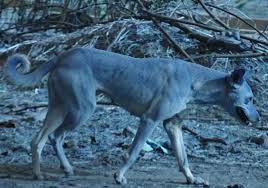

In [ ]:
img = cv2.imread('/content/download.jpg')
img

In [ ]:
# img = cv2.imread('/content/kagglecatsanddogs_3367a/PetImages/train/Dog/10003.jpg')
img = cv2.resize(img, (256, 256))
img = img.reshape(1, 256, 256, 3)
# img = img/255.0

In [ ]:
img.shape

(1, 256, 256, 3)

In [ ]:
out = model.predict(img)
if out[0][0] > 0.5:
  print('dog')
else:
  print('cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
dog


In [ ]:
out[0][0]

5.363901e-06

# Trial No.2 Adding drop-out and regulasization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import regularizers

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
his = model.fit(train_ds, epochs= 25, validation_data=test_ds)

Epoch 1/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 80s 110ms/step - accuracy: 0.5009 - loss: 28.1550 - val_accuracy: 0.5049 - val_loss: 3.1424
Epoch 2/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 56s 83ms/step - accuracy: 0.5149 - loss: 2.7135 - val_accuracy: 0.5067 - val_loss: 1.8491
Epoch 3/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5206 - loss: 1.6645 - val_accuracy: 0.5316 - val_loss: 1.3049
Epoch 4/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.5397 - loss: 1.2482 - val_accuracy: 0.5382 - val_loss: 1.1237
Epoch 5/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.5473 - loss: 1.0890 - val_accuracy: 0.5624 - val_loss: 0.9875
Epoch 6/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.5580 - loss: 0.9864 - val_accuracy: 0.5668 - val_loss: 1.0489
Epoch 7/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5939 - loss: 0.9936 - val_accuracy: 0.6249 - val_loss: 0.9618
Epoch 8/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.6190 - loss: 0.9533 

Text(0, 0.5, 'Accuracy')

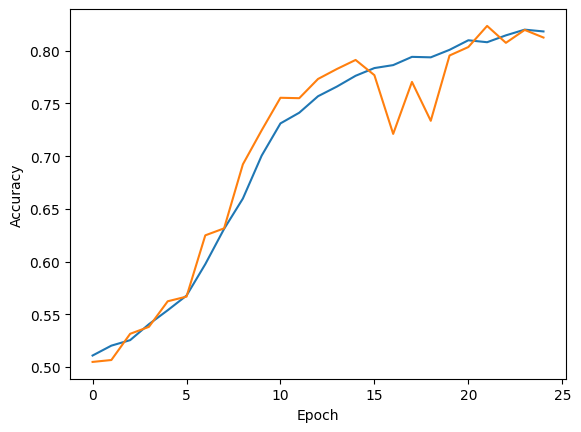

In [ ]:
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')



Observation from graph

as epochs increases both accuracy and val_accuracy also increases.

epochs are directly propotional

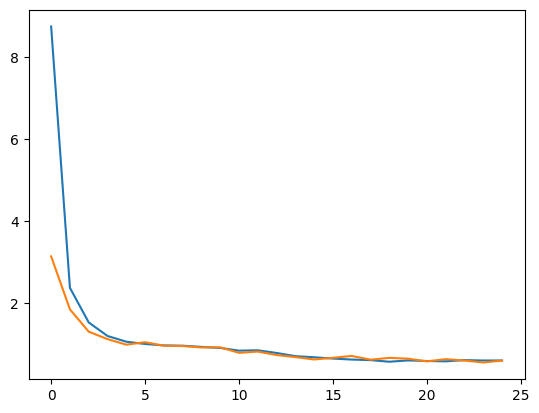

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

Here the Losses are inversly to the Epochs



Addressing Issues:

Validation Accuracy Higher than Training Accuracy

May be Easier Validation Set: validation set is very less as comapred to training set its in ratio of 8:2
20000 of traing set and 5000 of validation

Regularization: If you have strong regularization (e.g., high dropout rate or L2 penalty), it might be hindering performance on the training set but helping on the validation set.
adjusting the  regularization parameters.


# Predicting the model

In [ ]:
model.save('/content/model_v-02.h5')
model.save_weights('/content/model_weights_v-02.weights.h5')

In [ ]:
from keras.preprocessing import image
import numpy as np
img = load_img('/content/download.jpg', target_size=(256, 256))
img

In [ ]:
img = img_to_array(img)
img = img.reshape(1, 256, 256, 3)

# Trail No 3 Hyperparameter Tuning

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
his3 = model.fit(train_ds, epochs= 25, validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8200 - loss: 0.5899 - val_accuracy: 0.7876 - val_loss: 0.7575
Epoch 2/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8251 - loss: 0.6212 - val_accuracy: 0.8243 - val_loss: 0.5820
Epoch 3/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8281 - loss: 0.5817 - val_accuracy: 0.8347 - val_loss: 0.6515
Epoch 4/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.8316 - loss: 0.6485 - val_accuracy: 0.7882 - val_loss: 0.6068
Epoch 5/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.8284 - loss: 0.5873 - val_accuracy: 0.7690 - val_loss: 0.7321


In [ ]:
best_epochs = early_stopping.stopped_epoch - early_stopping.patience + 1
print(f"Best Epoch: {best_epochs}")  # Output: Best Epoch:

Best Epoch: 2


In [ ]:
# plt.plot(his3.history['loss'], label='accuracy')
# plt.plot(his3.history['val_loss'], label='val_accuracy')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import regularizers

model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu', input_shape=(256, 256, 3)))
model_3.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model_3.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model_3.add(Dropout(0.25))

model_3.add(Flatten())


model_3.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.01)))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,819,393 (26.01 MB)

 Trainable params: 6,819,393 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
his_3 = model_3.fit(train_ds, epochs= 50, validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5336 - loss: 1.7313 - val_accuracy: 0.5324 - val_loss: 1.2529
Epoch 2/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.5558 - loss: 1.1509 - val_accuracy: 0.5412 - val_loss: 0.9549
Epoch 3/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.5592 - loss: 0.9032 - val_accuracy: 0.5690 - val_loss: 0.8080
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.5748 - loss: 0.7853 - val_accuracy: 0.5500 - val_loss: 0.7561
Epoch 5/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.5772 - loss: 0.7368 - val_accuracy: 0.5891 - val_loss: 0.7142
Epoch 6/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6153 - loss: 0.7124 - val_accuracy: 0.6313 - val_loss: 0.6969
Epoch 7/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6472 - loss: 0.6887 - val_accuracy: 0.6997 - val_loss: 0.6460
Epoch 8/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6771 - loss: 0.6588 - 

Text(0, 0.5, 'Accuracy')

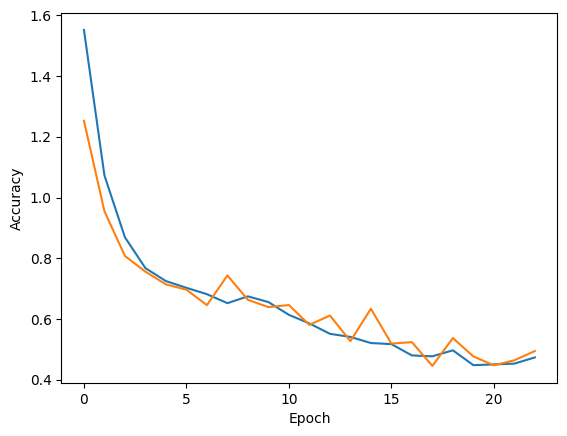

In [21]:
import matplotlib.pyplot as plt
plt.plot(his_3.history['loss'], label='accuracy')
plt.plot(his_3.history['val_loss'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

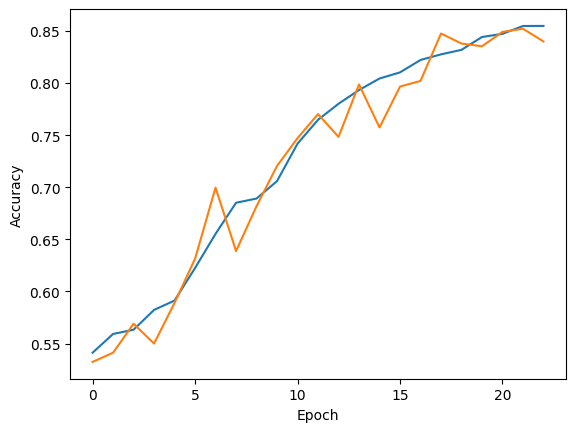

In [22]:
plt.plot(his_3.history['accuracy'], label='accuracy')
plt.plot(his_3.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

model_3 best performance

Epoch 20/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.8430 - loss: 0.4606 - val_accuracy: 0.8353 - val_loss: 0.4771

Epoch 21/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8459 - loss: 0.4479 - val_accuracy: 0.8491 - val_loss: 0.4478

Epoch 22/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.8562 - loss: 0.4430 - val_accuracy: 0.8521 - val_loss: 0.4644

Epoch 23/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8548 - loss: 0.4585 - val_accuracy: 0.8399 - val_loss: 0.4948

Model v3 reduced tarining loss and val_losss by 30% than previous model

model v3 performing better than previous one

In [23]:
model_3.save('/content/model_v-03.h5')
model_3.save_weights('/content/model_weights_v-03.weights.h5')

# Predicting using latest model

In [25]:
from keras.preprocessing import image

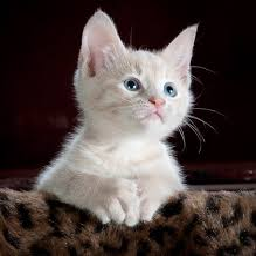

In [33]:
img = image.load_img('/content/ct.jpg', target_size=(256, 256))
img

In [34]:
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)

In [35]:
out =model_3.predict(img)
if out[0][0] > 0.5:
  print('dog')
else:
  print('cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
